In [33]:
import sys
import joblib
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )

In [34]:
# bonus is the target, and salary is the input
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '../tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

In [35]:
### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

In [36]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)
print("slope: ", reg.coef_)
print("intercept: ", reg.intercept_)

slope:  [5.44814029]
intercept:  -102360.54329388007


In [37]:
print("r-squared score on training data: ", reg.score(feature_train, target_train))

r-squared score on training data:  0.04550919269952436


In [38]:
print("r-squared score on test data: ", reg.score(feature_test, target_test))


r-squared score on test data:  -1.484992417368511


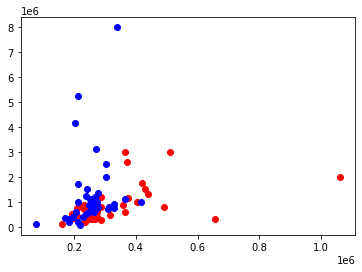

In [39]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


No handles with labels found to put in legend.


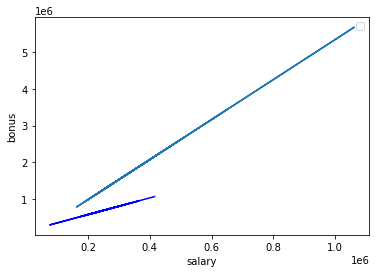

In [40]:
### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [41]:
# slope of a new regression line without an outlier
print("slope: ", reg.coef_)
print("intercept: ", reg.intercept_)

slope:  [2.27410114]
intercept:  124444.38886605436
